# Predicting stars of Yelp reviews using only text

I did this analysis for the Udemy course on Python for Data Science and Machine Learning.

This dataset containts Yelp reviews. We mainly focus on the text of the review and the amount of stars that were given. Additionally, reviews can also be rated as 'cool', 'useful' or 'funny' by other Yelp users.

After exploratory data analysis I will create various visualizations of the data. Finally, we will try to predict whether a review received 1 or 5 stars using only the text of the review.

In [25]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
# Import data and start EDA
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26-1-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27-7-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14-6-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27-5-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,5-1-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [9]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [28]:
# Create additional column to get length of review
yelp['text length'] = yelp['text'].apply(len)

### Visualization Time

From the following visualizations it can be seen that the more stars a review gives, the lower the text length of the review generally is. Additionally, we can also see that we have more 4-5 star reviews than 1-3 star reviews in this dataset.

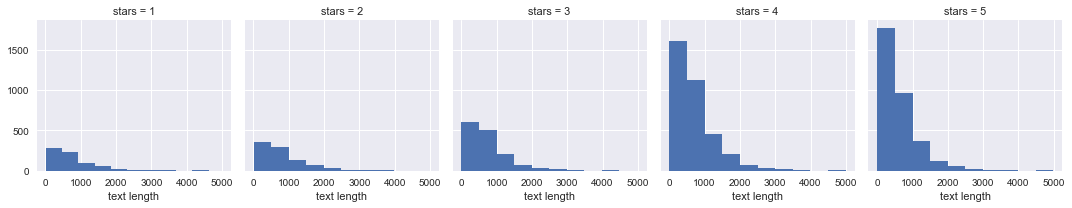

In [19]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length')

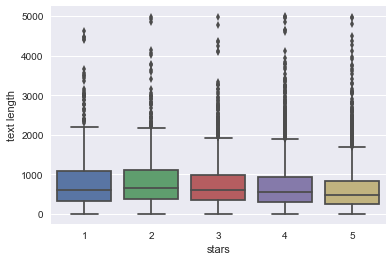

In [20]:
sns.boxplot(x = 'stars', y = 'text length', data = yelp)

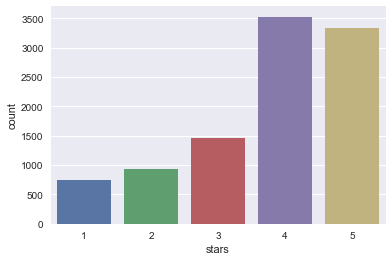

In [21]:
sns.countplot(x = 'stars', data = yelp)

#### Let's have a look at the correlations the categories cool, funny, useful and the text length of the review. To do this we create a heatmap.

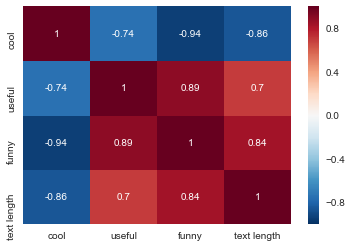

In [22]:
sns.heatmap(yelp.groupby(['stars']).mean().corr(), annot=True)

### Machine Learning Model

Next we build a machine learning model that predicts whether a review gave 1 or 5 stars depending on the text in the review.

In [30]:
# We only take into account 1 or 5 star reviews.
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
y = yelp_class['stars']

cv = CountVectorizer()
X = cv.fit_transform(X)

# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226

0.925774877651


### Pipeline

In order to reduce the lines of code we can also use a 'pipeline'. This is very useful when you create much more complicated models that need much more pre-processing.

In [34]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pipeline = Pipeline([
                    ('count', CountVectorizer()),
                    ('Classification', MultinomialNB())                     
                     ])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[155  73]
 [ 15 983]]
             precision    recall  f1-score   support

          1       0.91      0.68      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.93      0.93      0.92      1226

0.928221859706


## Conclusion

Based on a very simple model that only uses a count vectorizer on our text data we were already able to achieve an accuracy of more than 92% with our classification. From the confusion matrix and classification report we can see that the model scores less well in classifying 1-star reviews. This is probably caused by the dataset being unbalanced. We have much more 5-star reviews than 1-star reviews in the dataset. Additional research could look into unbalancing the dataset and into including other variables from our dataset like the cool/funny/useful variables to improve the classification score.